### Drone deposits

In this assignment I will use clustering to determine where a drone company should place their drone deposits according to the distance between each drone.

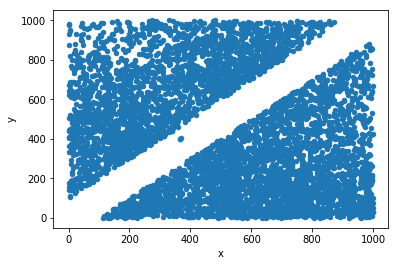

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
filepath = "C:/Users/ottoj_000/Desktop/dronedelivery.csv"
df = pd.read_csv(filepath, sep=';')
df.plot.scatter(x='x', y='y')

TypeError: unhashable type: 'slice'

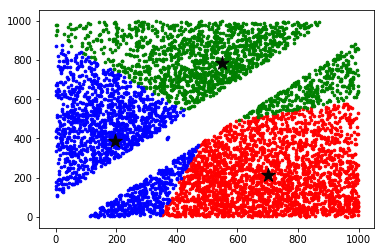

<Figure size 720x504 with 0 Axes>

In [23]:
from copy import deepcopy
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the coordinates
filepath = "C:/Users/ottoj_000/Desktop/dronedelivery.csv"
df = pd.read_csv(filepath, sep=';')
df.drop('clientid',axis=1,inplace=True)
xx = df['x'].values
yy = df['y'].values
X = np.array(list(zip(xx,yy)))
#plt.scatter(xx, yy, c='black', s=7)

#Creating the new dataframe that collects the id of the depot of each drone
#Leaving the 'clientid' to be changed when applying colors
newdf =  pd.read_csv(filepath, sep=';')

#Euclidean distance calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

#The long and dumb way of doing this
#Creating the clusters, more clusters means a LOT longer calculation time
k = 3
c_x = np.random.randint(0, np.max(X)-20, size=k)
c_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(c_x, c_y)), dtype=np.float32)
#Original values
#print(C)

#printing all these just to see what it looks like
#plt.scatter(xx, yy, c='#050505', s=7)
#plt.scatter(c_x, c_y, marker='*', s=200, c='g')

#store the value of centroids when it updates
C_old = np.zeros(C.shape)
#Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
#Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

#Assigning colors to all the points
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'purple', 'brown', 'gray', 'black']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        #Here I attempt to find the value of the currently used coordinate (points) to
        #the value of the same coordinate from newdf, and replace 'clientid' with colors[i].
        #It doesn't work.
        #newdf.loc[newdf['x'] == points[:,0], 'clientid'] = colors[i]
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


#The short and smarter(?) way.    
#sklearn clusters
from sklearn.cluster import KMeans
#Num of clusters
kmeans = KMeans(n_clusters=3)
#Fitting the input data
kmeans = kmeans.fit(df)
#Getting the cluster labels
labels = kmeans.predict(df)
#Centroid values
centroids = kmeans.cluster_centers_

#print(C)
#print(centroids)

In [ ]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import scipy.cluster.hierarchy as shc

#creating the dataframe
filepath = "C:/Users/ottoj_000/Desktop/dronedelivery.csv"
df = pd.read_csv(filepath, sep=';')
df.drop('clientid',axis=1,inplace=True)

#creating dendograms
plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

#doing the thing I was actually asked to do
#cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
#cluster.fit_predict(df)
#plt.figure(figsize=(10, 7))  
#plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')